The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


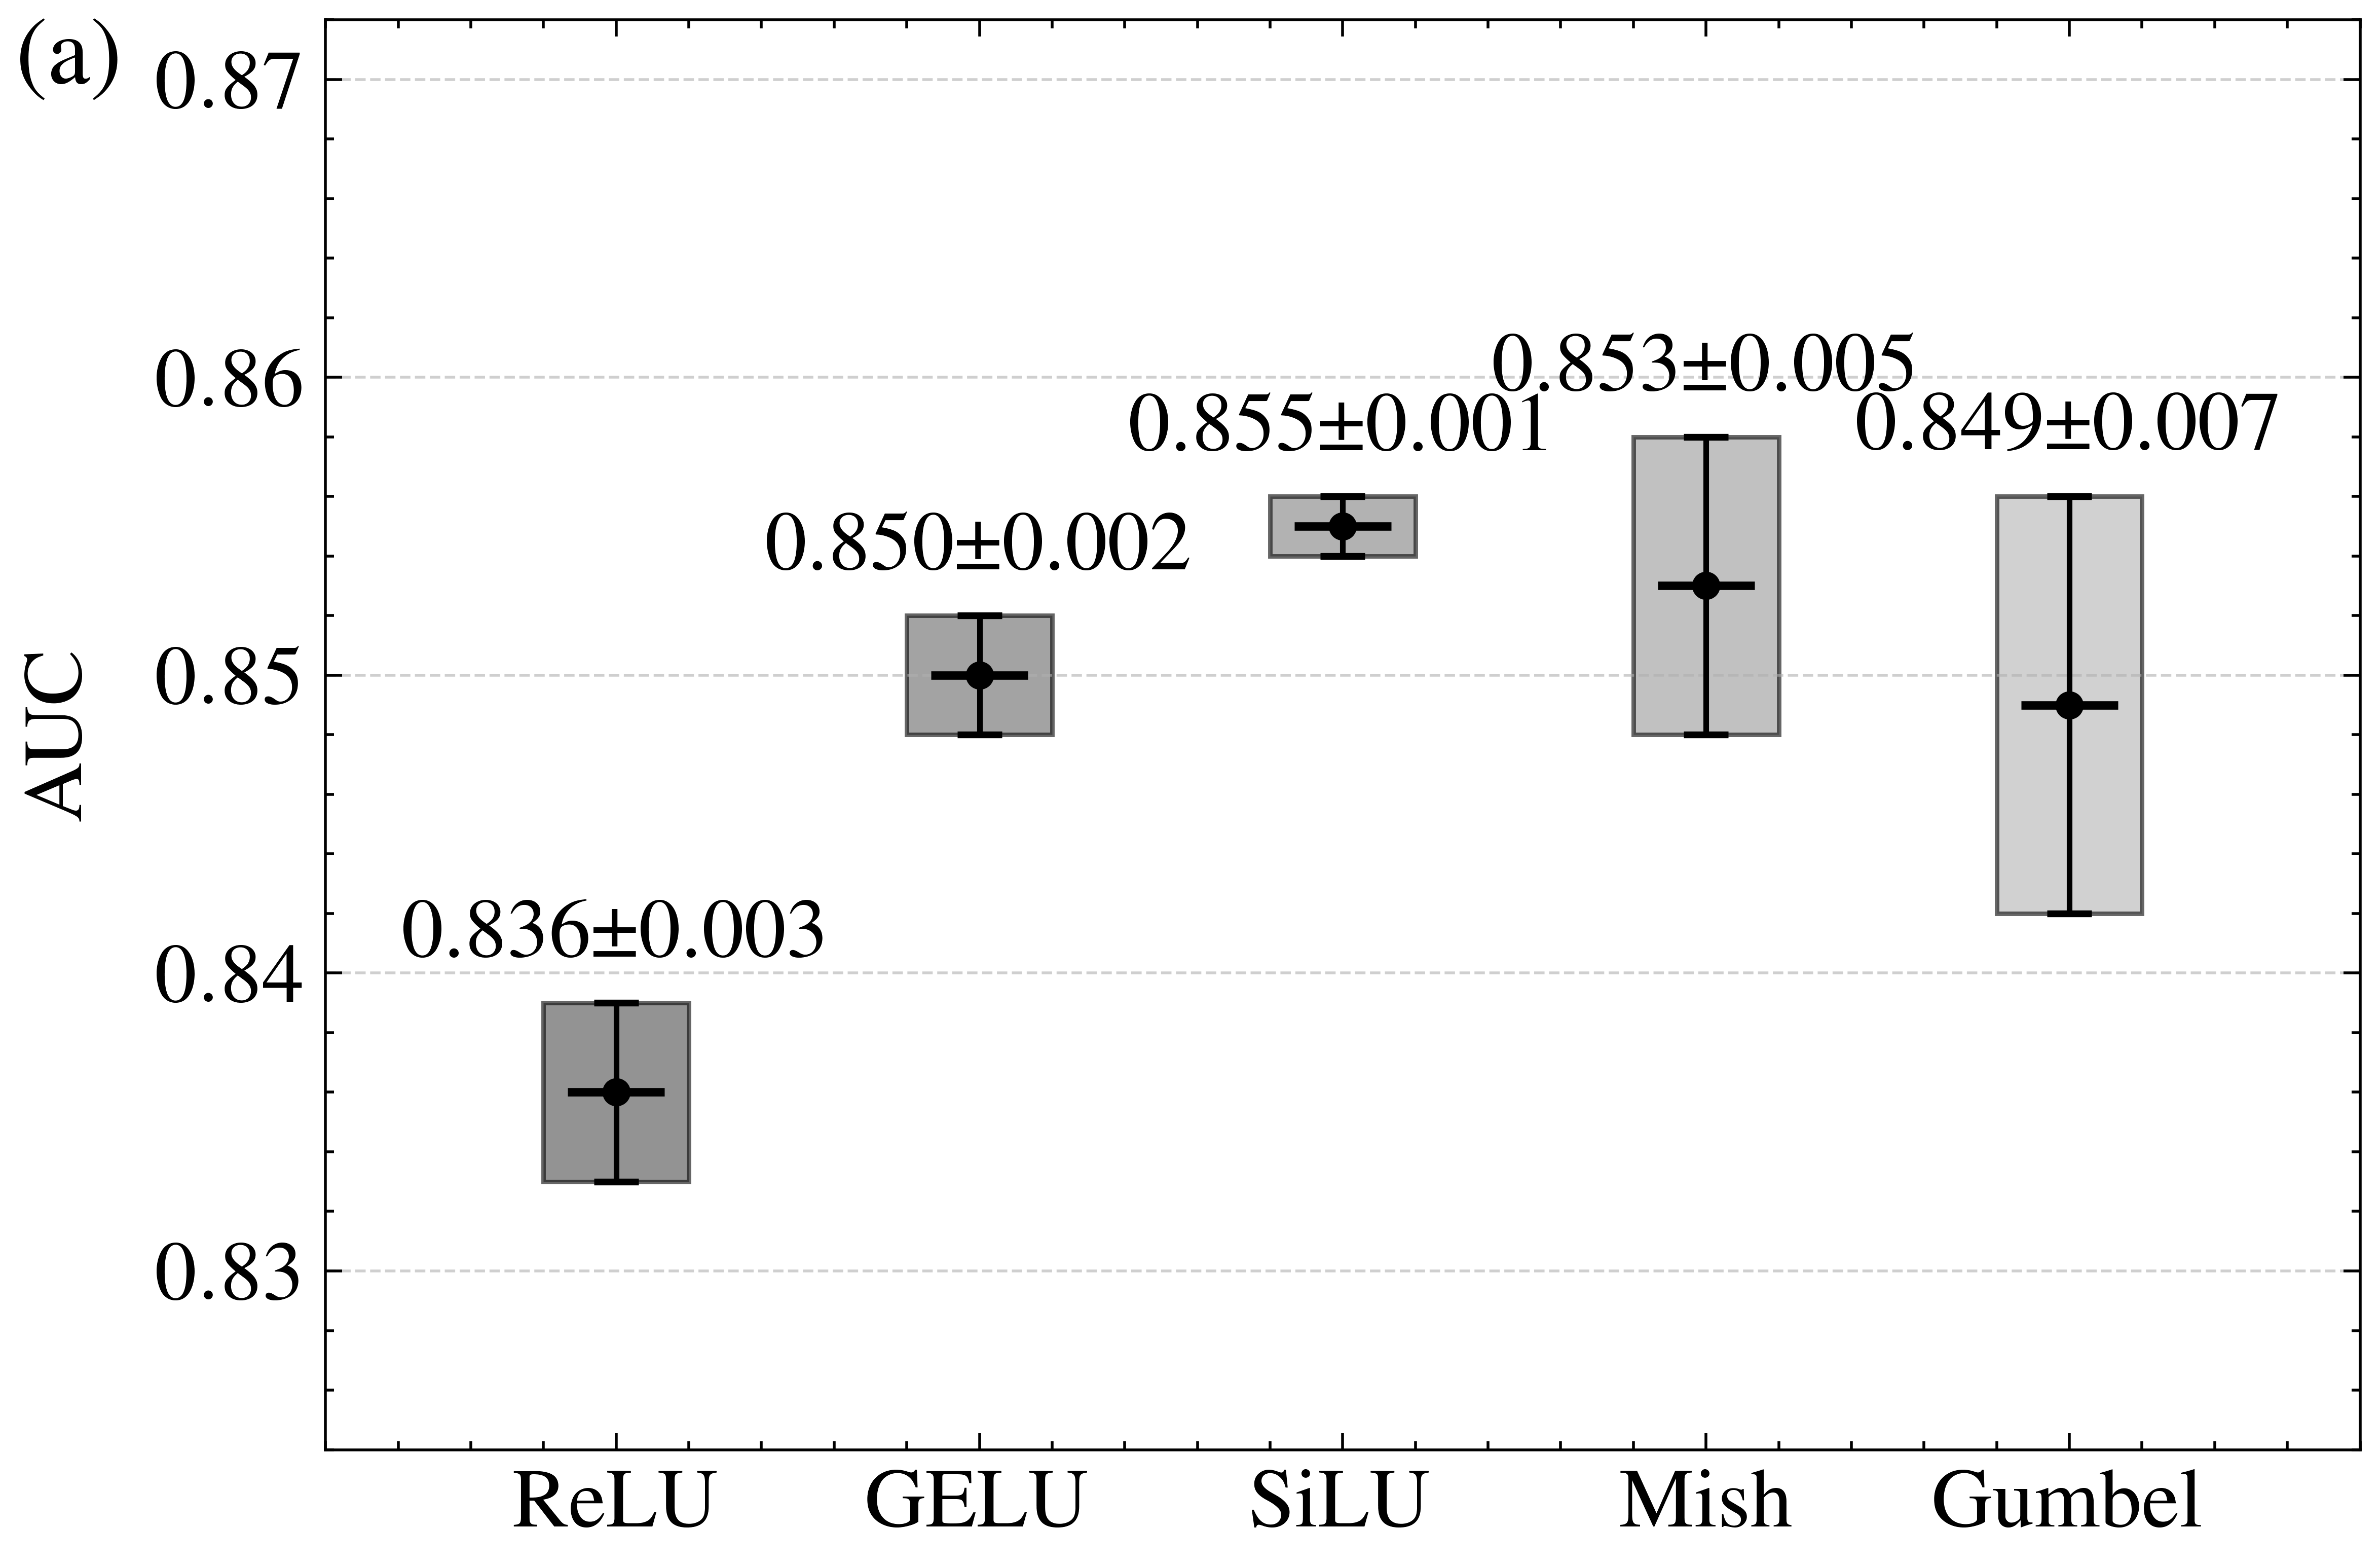

In [18]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import scienceplots
# 设置绘图风格
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.unicode_minus'] = False  # 正常显示负号
#plt.style.use(['seaborn-v0_8-deep'])  # 使用seaborn的清爽风格
plt.style.use(['science', 'ieee'])
# 设定AUC数据
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']
auc_means = [0.836, 0.850, 0.855, 0.853, 0.849]
auc_stds = [0.003, 0.002, 0.001, 0.005, 0.007]

# 创建图形
fig, ax = plt.subplots(figsize=(6, 4), dpi=800)
ax.grid(True, linestyle='--', alpha=0.6, axis='y')
# 设置x轴坐标
x = np.arange(len(activation_functions))
width = 0.4  # 适中宽度

# 生成灰度颜色，区分不同激活函数
gray_levels = np.linspace(0.3, 0.7, len(activation_functions))  # 颜色从浅到深
colors = [plt.cm.gray(level) for level in gray_levels]

# 绘制误差范围矩形 + 误差条 + 均值线
for i in range(len(activation_functions)):
    lower = auc_means[i] - auc_stds[i]
    upper = auc_means[i] + auc_stds[i]

    # 误差范围矩形（浅灰色）
    ax.bar(x[i], upper - lower, width=width, bottom=lower, color=colors[i], alpha=0.6, edgecolor='black', linewidth=0.8)

    # 均值线（深灰色）
    ax.hlines(auc_means[i], x[i] - width/3, x[i] + width/3, colors='black', linestyles='-', linewidth=1.5)

    # 误差条
    ax.errorbar(x[i], auc_means[i], yerr=auc_stds[i], fmt='o', color='black',
                capsize=4, capthick=1.2, markersize=4)

    # 添加数值标签，稍微靠上
    ax.annotate(f'{auc_means[i]:.3f}±{auc_stds[i]:.3f}',
                xy=(x[i], upper),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=15, fontweight='bold')

# 设置轴标签
ax.set_ylabel('AUC', fontsize=15, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=15)
ax.tick_params(axis='y', labelsize=15)

# 设置y轴范围，保证数据居中
y_min = min(auc_means) - max(auc_stds) - 0.005
y_max = max(auc_means) + max(auc_stds) + 0.01
ax.set_ylim(y_min, y_max)

# 添加网格线


# x轴增加两侧空白
ax.set_xlim(x[0] - 0.8, x[-1] + 0.8)

# 添加 (a) 标记
ax.text(-0.15, 1.0, '(a)', transform=ax.transAxes, fontsize=17, va='top', fontweight='bold')

# 调整布局，防止裁剪
plt.tight_layout()

# 保存为EPS文件
plt.savefig('D:/Credit Card Fraud Detection/Fig3a.eps', format='eps', dpi=800)

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


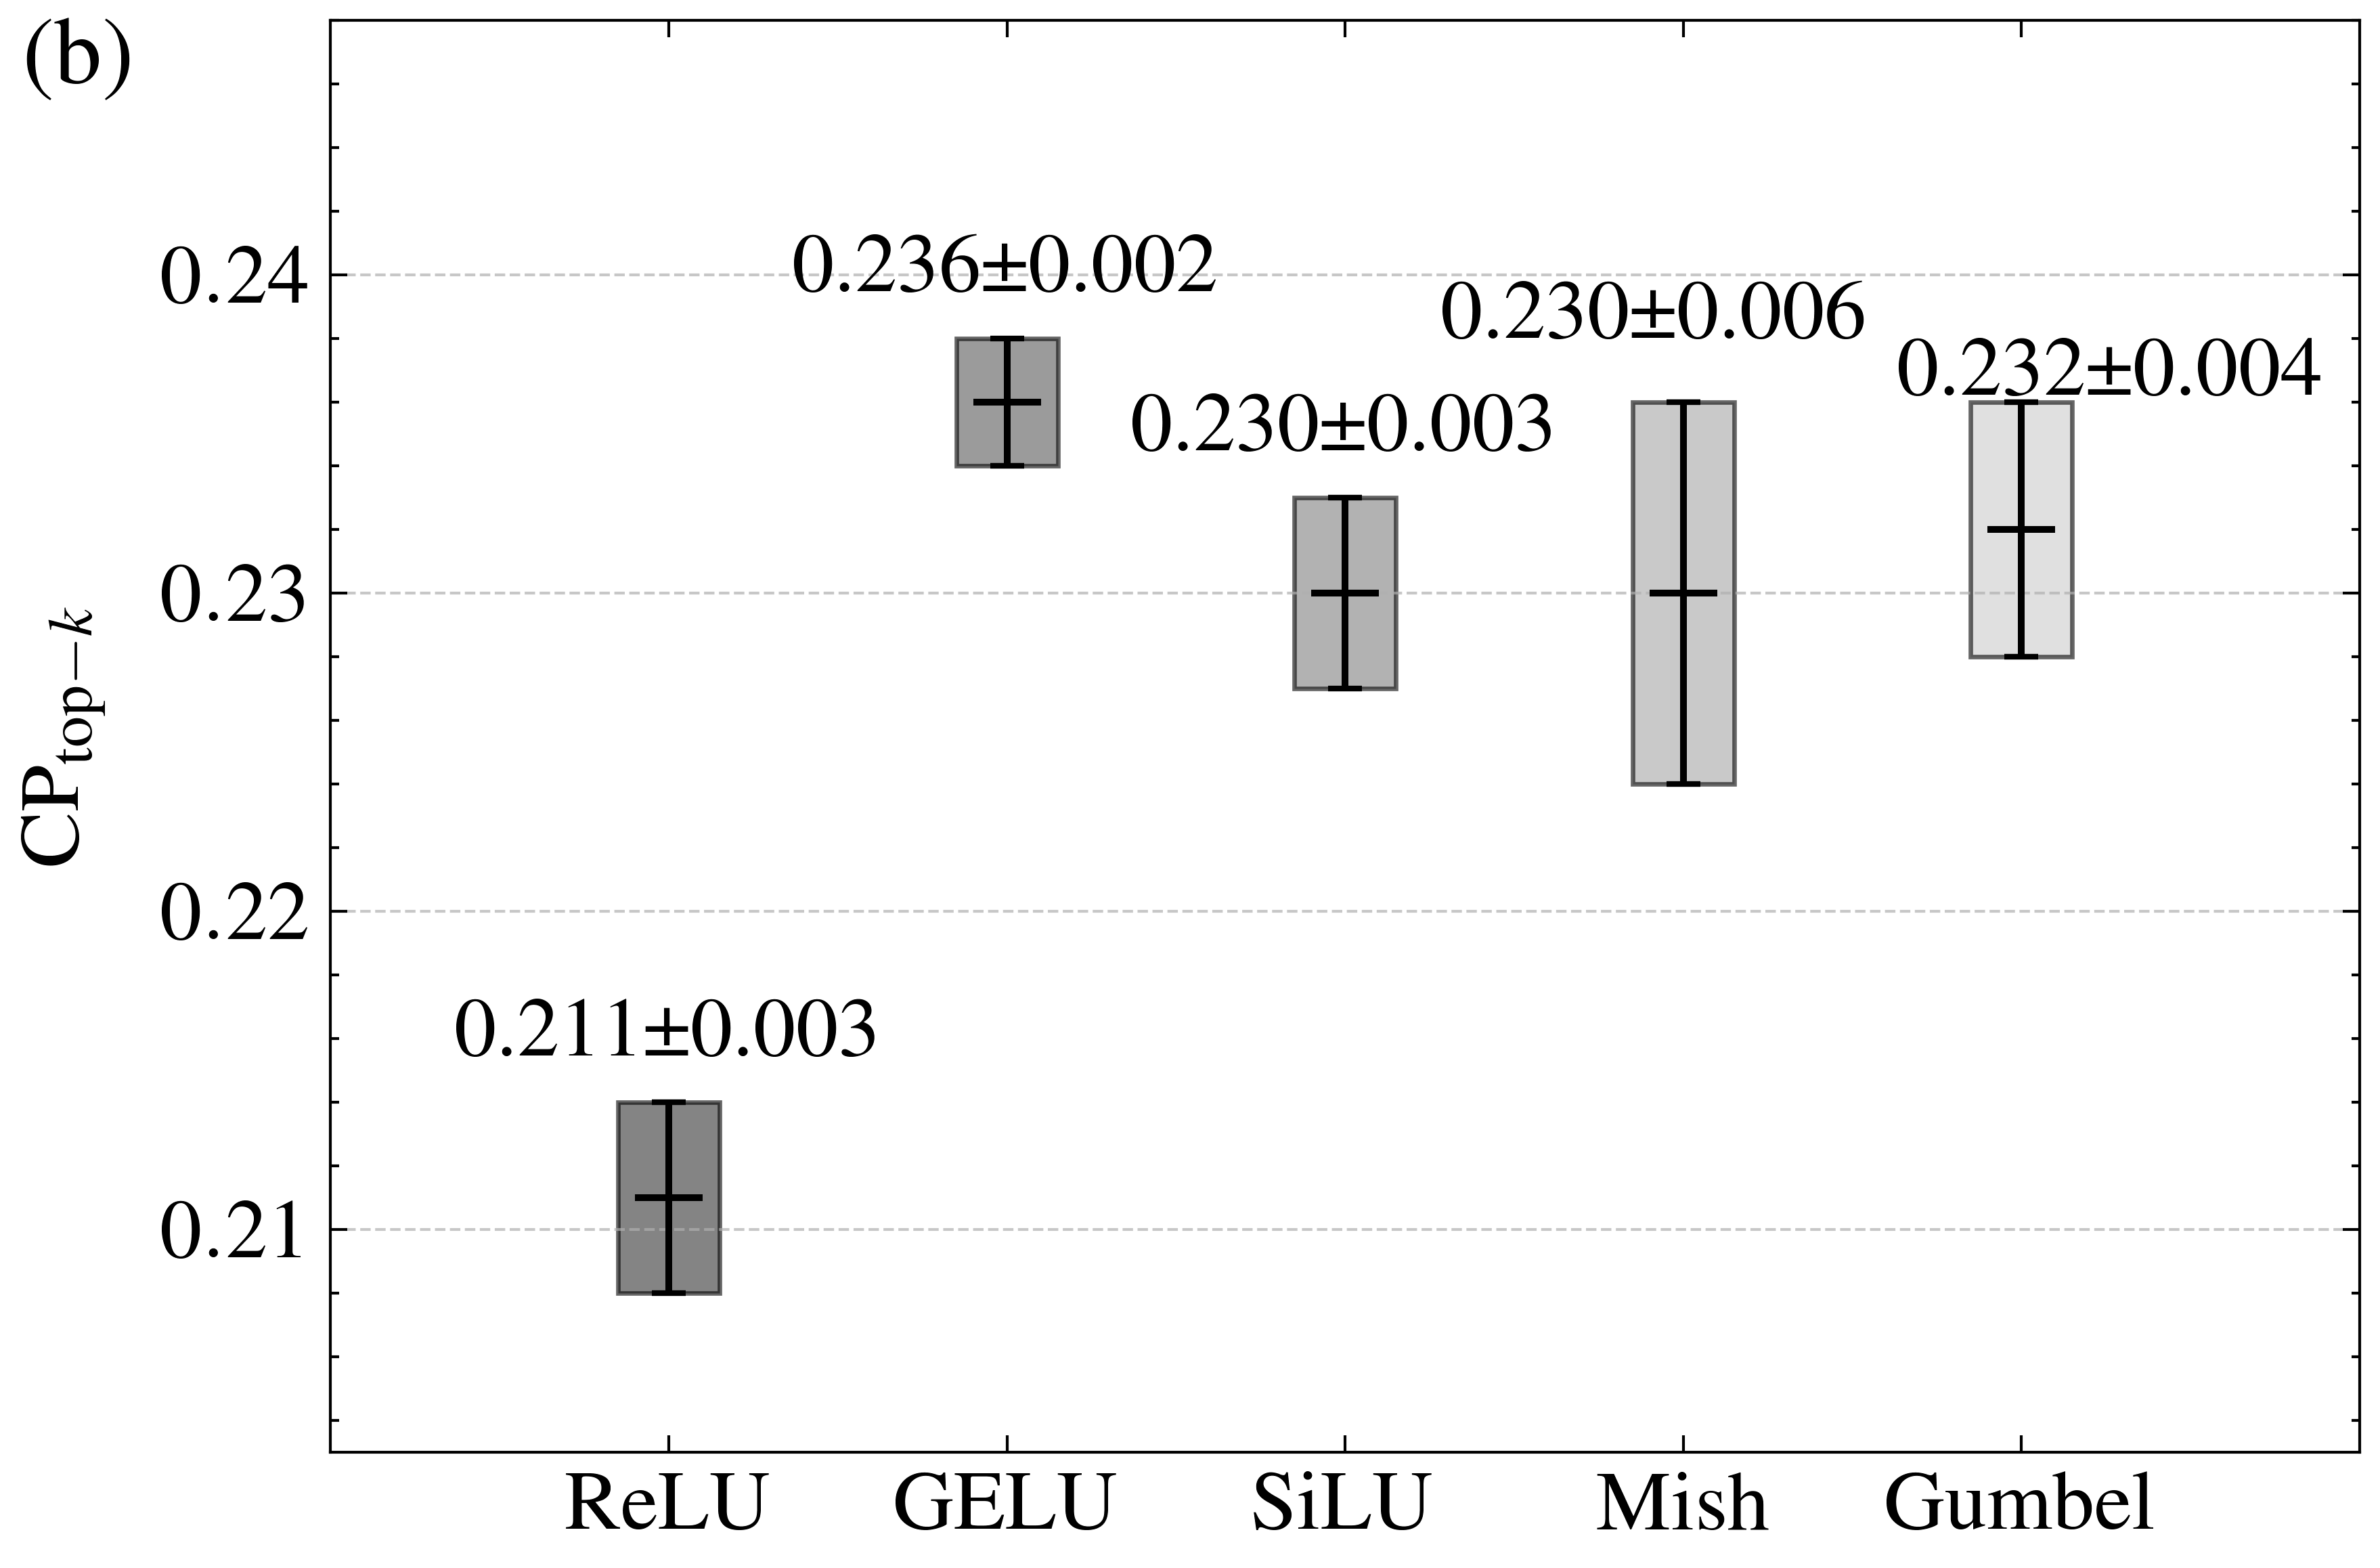

In [20]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scienceplots

# 禁用LaTeX渲染以避免中文问题
plt.rcParams['text.usetex'] = False
plt.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['figure.dpi'] = 800
mpl.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use(['science', 'ieee'])

# 激活函数及其 CP_top-k 结果数据
activation_functions = ['ReLU', 'GELU', 'SiLU', 'Mish', 'Gumbel']
auc_means = [0.211, 0.236, 0.230, 0.230, 0.232]  # 修改后的均值
auc_stds = [0.003, 0.002, 0.003, 0.006, 0.004]  # 修改后的标准差

# 创建图形和轴
fig, ax = plt.subplots(figsize=(6, 4))

# 设置 x 轴位置
x = np.arange(len(activation_functions))

# 调窄矩形和误差条的宽度
width = 0.3  # 更窄的宽度

# 创建灰度颜色列表，使用不同的深浅
gray_levels = np.linspace(0.2, 0.8, len(activation_functions))  # 从浅到深的灰度
colors = [plt.cm.gray(level) for level in gray_levels]
# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7, axis='y', zorder=0) # 让网格线在最底层
# 绘制误差范围矩形、均值线和误差条
for i in range(len(activation_functions)):
    # 计算下限和上限
    lower = auc_means[i] - auc_stds[i]
    upper = auc_means[i] + auc_stds[i]

    # 绘制误差范围矩形
    ax.bar(x[i], upper - lower, width=width, bottom=lower, color=colors[i], alpha=0.6, edgecolor='black', linewidth=0.8)

    # 在矩形中心添加均值线
    ax.hlines(auc_means[i], x[i] - width / 3, x[i] + width / 3, colors='black', linestyles='-', linewidth=1.2)

    # 使用 errorbar 绘制误差条
    ax.errorbar(x[i], auc_means[i], yerr=auc_stds[i], fmt='none',
                color='black', capsize=3, capthick=1, linestyle='-', linewidth=1.2, zorder=3)

    # 添加数值标签
    y_offset = 5  # 默认偏移量
    x_offset = 0  # 默认水平偏移

    if i == len(activation_functions) - 2:  # Mish
        y_offset = 8
        x_offset = -5
    elif i == len(activation_functions) - 1:  # Gumbel
        y_offset = -2
        x_offset = 16

    ax.annotate(f'{auc_means[i]:.3f}±{auc_stds[i]:.3f}',
                xy=(x[i], upper),
                xytext=(x_offset, y_offset),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=15)

# 设置标题和轴标签
ax.set_ylabel(r'CP$_{\rm top-{\it k}}$', fontsize=15, labelpad=10)

# 设置 x 轴刻度和标签
ax.set_xticks(x)
ax.set_xticklabels(activation_functions, fontsize=15)
ax.tick_params(axis='y', labelsize=15)  # y 轴刻度标签字体大小
ax.xaxis.set_minor_locator(plt.NullLocator())

# 设置 y 轴范围，使图表更清晰
y_min = min([m - s for m, s in zip(auc_means, auc_stds)]) - 0.005
y_max = max([m + s for m, s in zip(auc_means, auc_stds)]) + 0.01
ax.set_ylim(y_min, y_max)



# 设置 x 轴范围，增加两侧空白
ax.set_xlim(x[0] - 1, x[-1] + 1)  # 关键行：增加 x 轴范围

# 添加 (b) 标记
ax.text(-0.15, 1.0, '(b)', transform=ax.transAxes, fontsize=17, va='top')

# 调整布局
plt.tight_layout()

# 保存为 EPS 文件
plt.savefig('D:/Credit Card Fraud Detection/Fig3b.eps', format='eps', dpi=800)

plt.show()
